# Stefan-Boltzmann law: tungsten filament light-bulb
## Data processing

In [1]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import csv
from scipy.optimize import curve_fit

mpl.rcParams['text.usetex'] = True

In [2]:
volt = [] #measured voltages in V
curr = [] #measured current in mA

In [3]:
# read csv data and parse into lists defined in previous cell
with open('data.csv', 'r') as data:
    csv_reader = csv.reader(data)
    
    for line in csv_reader:
        volt.append(float(line[0]))
        curr.append(float(line[1]))

In [4]:
# split voltage data in 13 different data sets
V_1 = np.array(volt[0:21])
V_2 = np.array(volt[21:41])
V_3 = np.array(volt[41:61])
V_4 = np.array(volt[61:81])
V_5 = np.array(volt[81:101])
V_6 = np.array(volt[101:121])
V_7 = np.array(volt[121:141])
V_8 = np.array(volt[141:161])
V_9 = np.array(volt[161:181])
V_10 = np.array(volt[181:201])
V_11 = np.array(volt[201:221])
V_12 = np.array(volt[221:241])
V_13 = np.array(volt[241:262])


In [5]:
# split current data in 13 different data sets
I_1 = np.array(curr[0:21])
I_2 = np.array(curr[21:41])
I_3 = np.array(curr[41:61])
I_4 = np.array(curr[61:81])
I_5 = np.array(curr[81:101])
I_6 = np.array(curr[101:121])
I_7 = np.array(curr[121:141])
I_8 = np.array(curr[141:161])
I_9 = np.array(curr[161:181])
I_10 = np.array(curr[181:201])
I_11 = np.array(curr[201:221])
I_12 = np.array(curr[221:241])
I_13 = np.array(curr[241:262])

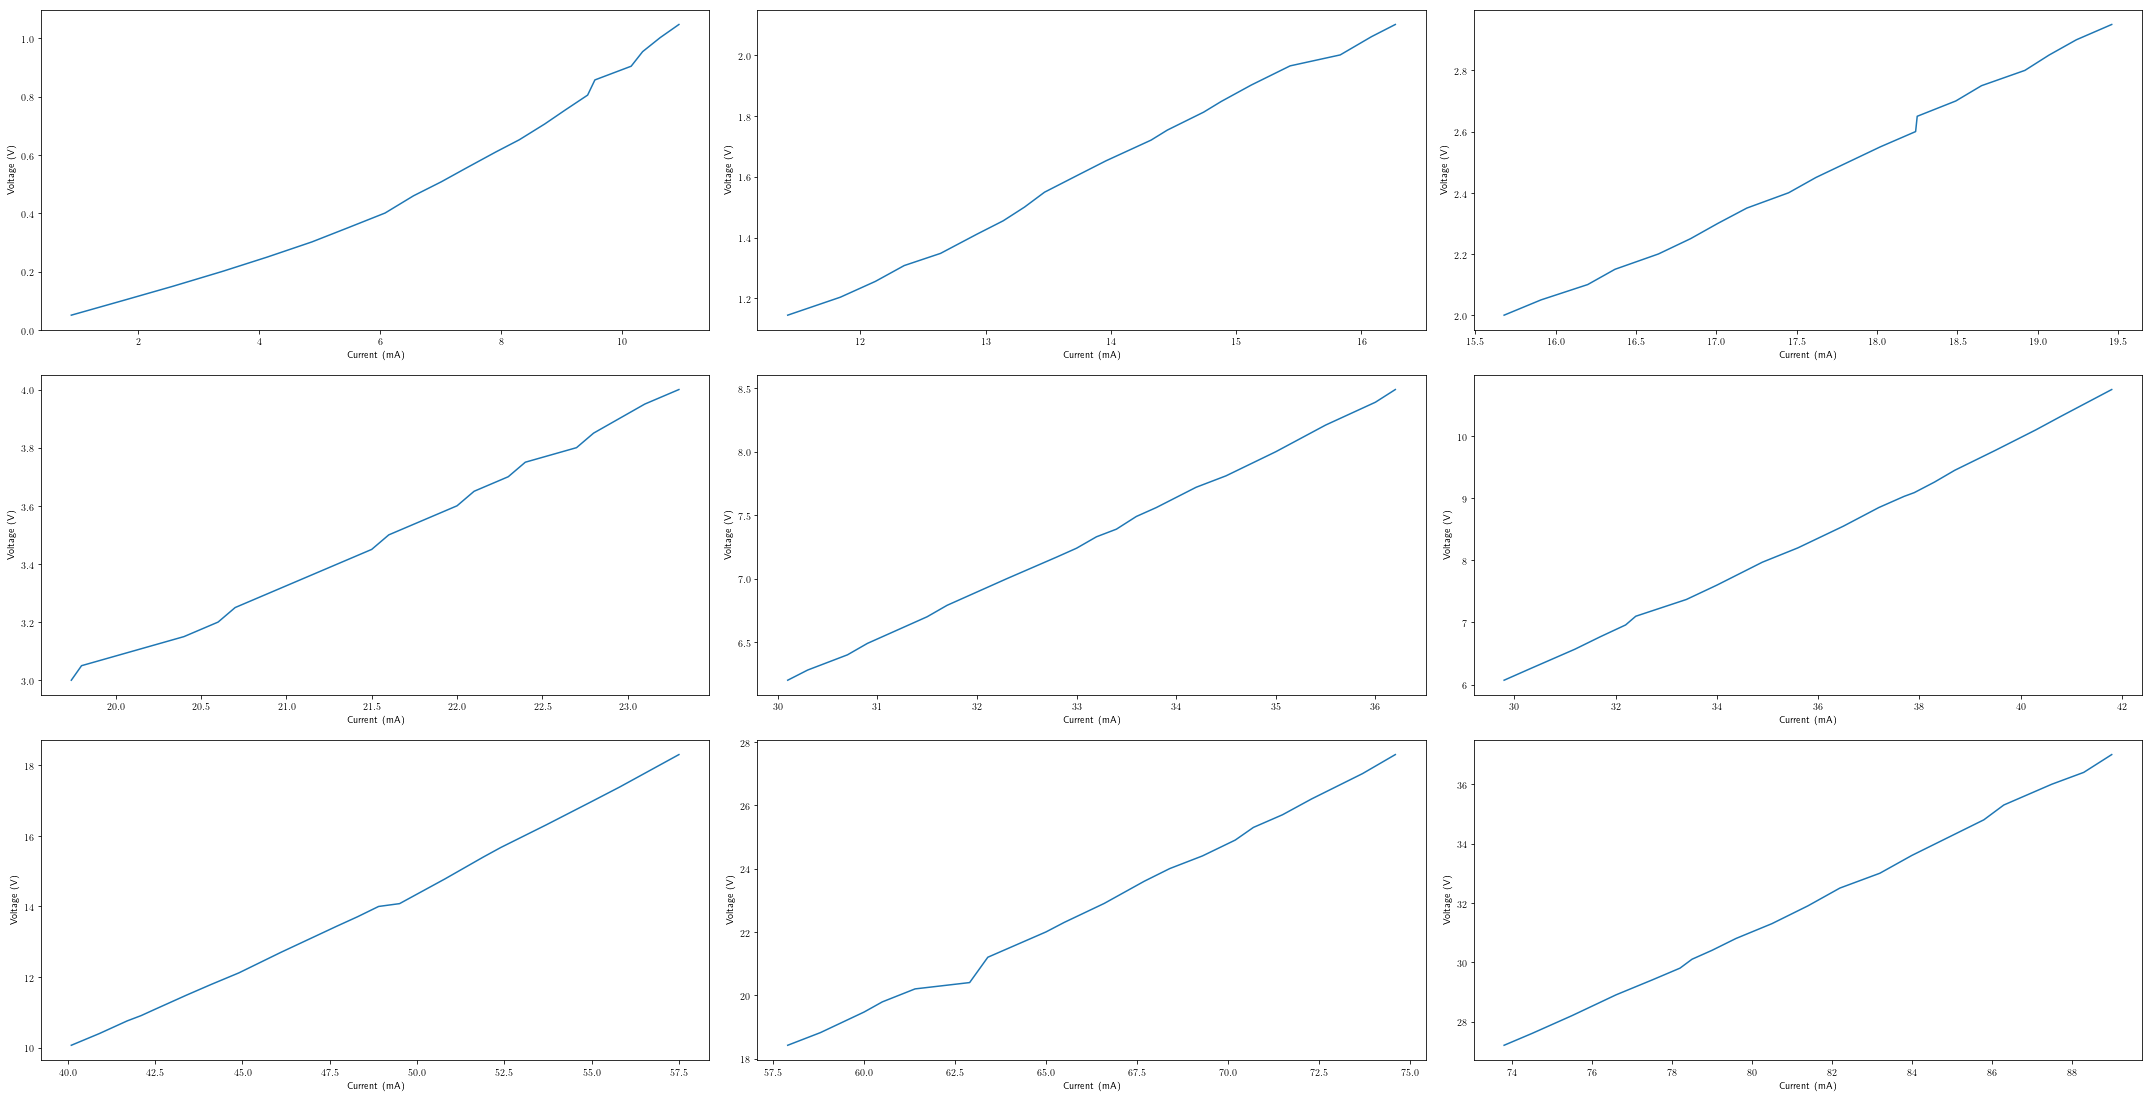

In [6]:
# plot V-I graphs for 13 different data sets. Resistance will be calculated using the slope.
plt.figure(figsize=(30,20))
plt.subplot(4,3,1)
plt.plot(I_1,V_1)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(4,3,2)
plt.plot(I_2,V_2)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(4,3,3)
plt.plot(I_3,V_3)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(4,3,4)
plt.plot(I_4,V_4)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(4,3,5)
plt.plot(I_5,V_5)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(4,3,6)
plt.plot(I_6,V_6)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(4,3,7)
plt.plot(I_7,V_7)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(4,3,8)
plt.plot(I_8,V_8)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(4,3,9)
plt.plot(I_9,V_9)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.show()

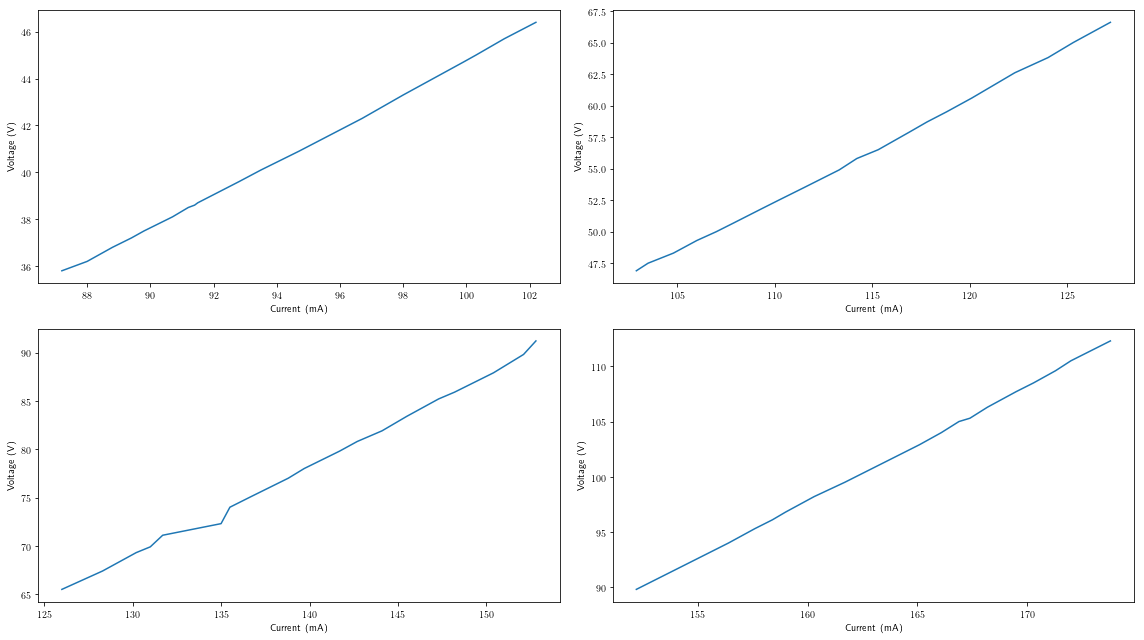

In [7]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.plot(I_10,V_10)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(2,2,2)
plt.plot(I_11,V_11)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(2,2,3)
plt.plot(I_12,V_12)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.subplot(2,2,4)
plt.plot(I_13,V_13)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.show()

In [8]:
# define numpy arrays for voltage and current
V=np.array(volt)
I=np.array(curr)

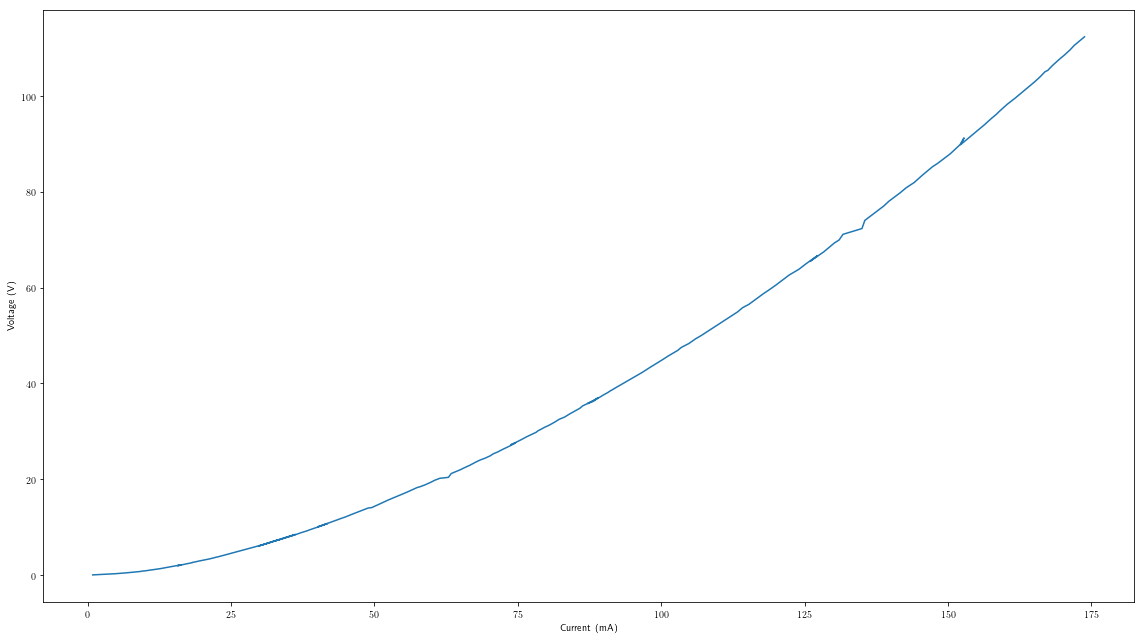

In [9]:
# plot V-I for full data set. Just for reference.
plt.figure(figsize=(16,9))
plt.plot(I,V)
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.show()

In [10]:
# defining resistance for every data point
R=np.true_divide(V,I)

In [11]:
R_0 = 0.057 #resistance at ambient temperature (294.6 K) in kΩ
rho_0 = 5.5447 #resistivity at ambient temperature (294.6 K) x10^-8 Ω·m

In [12]:
# defining resistivity for every data point
rest = R/R_0*rho_0

In [14]:
# temperature data, calculated using fit in Resistivity.ipynb
temp = np.array([ 297.34042407,  300.05788162,  301.77142096,  305.62414579,
        310.76919462,  316.88270435,  325.47787656,  333.05122444,
        350.40059514,  359.41171849,  368.87154373,  377.96723912,
        383.65841105,  393.15854224,  402.02110452,  410.38353349,
        427.32262802,  424.72137044,  437.03092282,  444.67841351,
        450.17787239,  467.45430111,  472.82790223,  480.11627455,
        488.64424674,  491.38351655,  500.60492722,  506.5475181 ,
        513.80773593,  522.26318015,  529.40530853,  534.49369905,
        540.95679505,  545.33024308,  551.190587  ,  555.51653008,
        561.29727883,  566.9046073 ,  563.51330118,  569.87004008,
        573.32505837,  567.86304728,  572.52810568,  575.3248259 ,
        581.43926503,  584.56073562,  589.55012103,  595.25893234,
        600.55978046,  603.49663253,  608.84351648,  613.24249661,
        617.53660818,  621.17910168,  630.528438  ,  633.40015795,
        638.39831571,  640.28035781,  645.36949382,  649.82408367,
        652.83580994,  654.16661823,  661.33644998,  661.98997684,
        662.62414317,  665.83965982,  671.59998474,  674.67417151,
        677.68705109,  680.64046408,  683.53617774,  688.9432703 ,
        691.71557618,  694.43512224,  699.65272365,  702.25805737,
        707.35866187,  707.32505871,  712.3064229 ,  719.58719129,
        721.89546283,  836.89488076,  841.129432  ,  845.12149609,
        850.28161565,  859.06962022,  863.99819113,  869.56349911,
        872.2923593 ,  878.46295045,  881.0757513 ,  885.63057623,
        887.18502231,  892.61881584,  895.07983127,  901.82410247,
        903.93446602,  911.10038833,  919.89258688,  925.71628477,
        930.51610986,  829.31770294,  837.85595155,  852.07785239,
        861.92183044,  870.42204497,  880.22897616,  885.22268525,
        894.62425421,  910.43246303,  916.85955433,  929.59272537,
        941.47976266,  946.73709023,  947.77274558,  954.04472441,
        961.85533747,  972.06739014,  982.66195601,  990.15261272,
       1003.80554426,  984.2823309 ,  994.46635431, 1006.56346858,
       1010.14034069, 1015.91850426, 1028.14608308, 1036.49166695,
       1044.78389669, 1062.56840639, 1082.61073784, 1089.27879702,
       1097.08236717, 1091.17160867, 1111.87891862, 1130.25447007,
       1137.6257455 , 1152.46683205, 1167.73848343, 1176.99070492,
       1198.44982632, 1198.05157985, 1204.1531459 , 1218.12815514,
       1226.3420046 , 1232.26943927, 1217.57453661, 1249.23603476,
       1258.9005736 , 1262.04105001, 1268.30690134, 1278.92543119,
       1293.8149501 , 1300.95214164, 1304.75347448, 1312.90932094,
       1322.74809521, 1327.71389679, 1336.8825227 , 1349.26166697,
       1360.5443153 , 1356.15635977, 1362.08990946, 1371.54709661,
       1383.27812677, 1389.70685754, 1395.04305982, 1402.37997431,
       1406.62926201, 1413.21258086, 1419.05090962, 1428.55796135,
       1439.33363455, 1443.21886563, 1453.60982085, 1462.33008731,
       1470.86035636, 1481.46528352, 1488.81963006, 1491.2873711 ,
       1502.04150624, 1486.11855212, 1488.61991396, 1497.9987294 ,
       1503.19956601, 1507.76628195, 1515.3504845 , 1521.7379407 ,
       1522.26014526, 1524.19525653, 1535.75278057, 1542.34081108,
       1546.97786178, 1551.55397196, 1560.11220791, 1568.4860117 ,
       1581.90396228, 1598.98086175, 1602.64916205, 1611.54177683,
       1618.92006533, 1624.29076101, 1633.85260728, 1639.7293345 ,
       1652.48435581, 1659.11821299, 1666.93747707, 1679.1377834 ,
       1686.61320238, 1696.88722291, 1711.1118466 , 1723.29976689,
       1727.52481233, 1743.29979433, 1752.28926811, 1759.8735011 ,
       1771.02354436, 1792.68686704, 1800.59184918, 1813.17285086,
       1827.48435341, 1816.39381444, 1832.6527142 , 1846.72716855,
       1853.12012691, 1857.04323896, 1875.53220993, 1862.84527486,
       1893.93911456, 1903.48345737, 1919.23539855, 1929.7185009 ,
       1943.80087027, 1952.72754849, 1958.93998716, 1973.02392587,
       1988.1711023 , 1991.68325497, 2005.64832517, 2022.88391751,
       2041.51844752, 2021.76316262, 2037.86959224, 2053.51289005,
       2064.07575552, 2069.81249624, 2075.87999345, 2086.76945061,
       2094.60761517, 2100.70283421, 2108.05561027, 2117.26289512,
       2125.4564796 , 2133.98474686, 2133.73682451, 2142.15166701,
       2151.86405294, 2156.73462234, 2164.41336775, 2171.8766213 ,
       2182.37968586])

In [68]:
power = V*I/1000 # power radiated by the light bulb in watts

In [69]:
# polynomial fit of power v. temperature
coeff = np.polyfit(temp,power,4)
P = np.poly1d(coeff)

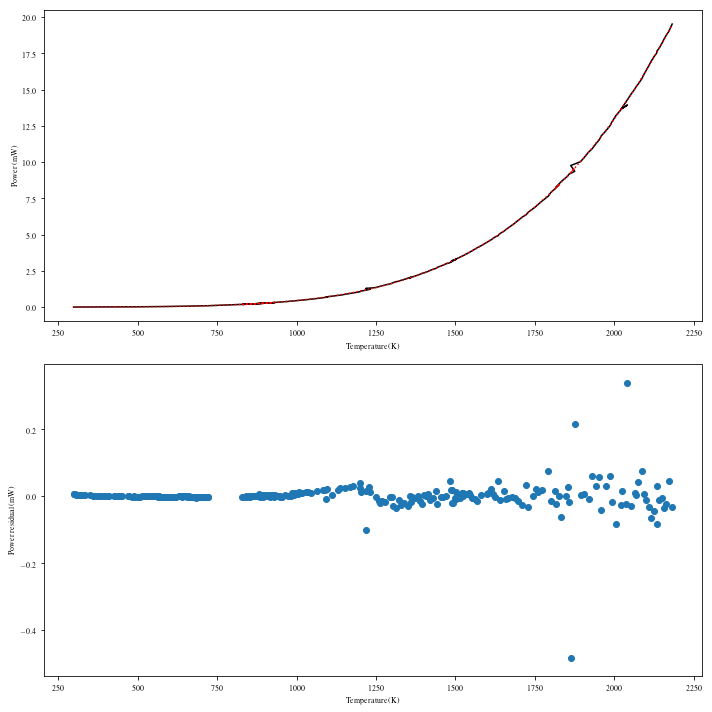

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # plot data vs polynomial fit
plt.plot(temp,power,'k')
plt.plot(temp,P(temp), 'r:')
plt.xlabel('Temperature (K)')
plt.ylabel('Power (mW)')
plt.subplot(2,1,2) #plot of residuals
plt.scatter(temp,P(temp)-power)
plt.xlabel('Temperature (K)')
plt.ylabel('Power residual (mW)')
plt.tight_layout()
plt.show()

In [48]:
def sb_law (T, A, B, a):
    return (A*T**a+B*T)

In [49]:
popt, pcov = curve_fit(sb_law, temp, power, method='lm')

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

IndexError: index 3 is out of bounds for axis 0 with size 3

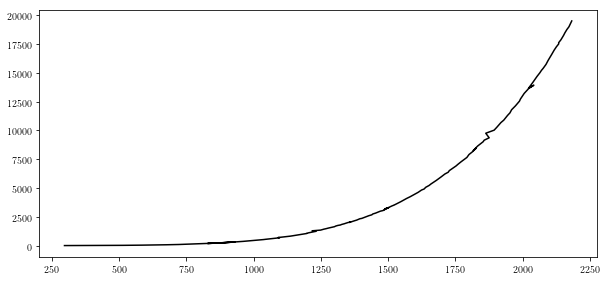

In [37]:
x = np.linspace(290,2200,500)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(temp,power,'k')
plt.plot(x,sb_law(x,popt[0],popt[1],popt[2],popt[3]), 'r:')
plt.xlabel('Temperature (K)')
plt.ylabel('Power (mW)')
plt.subplot(2,1,2)
plt.scatter(temp,sb_law(temp,popt[0],popt[1])-power)
plt.xlabel('Temperature (K)')
plt.ylabel('Power residual (mW)')

plt.tight_layout()
plt.show()

## Error propagation

In [21]:
# read csv data for voltage and current uncertainty and parse it into new lists
unc_v = []
unc_i = []
with open('errors.csv', 'r') as errors:
    csv_reader = csv.reader(errors)
    
    for line in csv_reader:
        unc_v.append(float(line[0]))
        unc_i.append(float(line[1]))

In [22]:
# change type of uncertainty lists to Numpy array
unc_v = np.array(unc_v)
unc_i = np.array(unc_i)

In [23]:
rel_v = np.true_divide(unc_v,V) # relative uncertainty of voltage
rel_i = np.true_divide(unc_i,I) # relative uncertainty of current

In [24]:
rel_r = rel_v+rel_i #relative uncertainty of resistance

In [25]:
unc_r = rel_r*R # nominal uncertainty of resistance

In [26]:
unc_rest = (rel_r+(0.001/R_0))*rest # uncertainty of resistivity

In [27]:
# uncertainty of temperature
unc_temp = np.array([11.50797328,  7.92328042,  6.77792328,  6.22246285,  5.95610912,
        5.80843003,  5.79403157,  5.78510245,  5.96939638,  6.03680857,
        6.12311379,  6.20202   ,  6.24495543,  6.34463569,  6.44469571,
        6.53653917,  6.77489524,  6.69187353,  6.8579584 ,  6.94967614,
        7.0097228 ,  7.23104424,  7.28521727,  7.3755248 ,  7.4866485 ,
        7.5118441 ,  7.63079459,  7.70662821,  7.8033657 ,  7.91783287,
        8.00849757,  8.07290159,  8.1513651 ,  8.20912925,  8.28234009,
        8.33930858,  8.41369482,  8.48343654, 10.46078448, 10.50679945,
       10.52415925, 10.54376878, 10.56948558, 10.56189992, 10.61883812,
       10.62126599, 10.66033692, 10.71420397, 10.76180358, 10.76715211,
       10.81817961, 10.85299185, 10.88705296, 10.91039333, 11.03821019,
       11.04949923, 11.10020929, 11.09576047, 11.14988136, 11.19341269,
       11.21197062, 11.20147686, 13.71352494, 13.65892963, 13.60587425,
       13.62060943, 13.70129543, 13.71447409, 13.72721315, 13.73953121,
       13.75144525, 13.82716861, 13.83775485, 13.84799216, 13.92106203,
       13.93008971, 14.00152143, 13.94725352, 14.01703375, 14.09267952,
       14.09902984, 15.18390983, 15.23609226, 15.26260845, 15.33174618,
       15.42306765, 15.48906536, 15.54631312, 15.57430428, 15.6337171 ,
       15.66036683, 15.7213326 , 15.7297637 , 15.80656605, 15.83129498,
       15.91333769, 15.92348613, 16.00541133, 16.11696841, 16.17729317,
       16.24515788, 15.0846366 , 15.17866316, 15.33156475, 15.45259403,
       15.55139494, 15.7039745 , 15.69529505, 15.8049453 , 16.00240039,
       16.0551435 , 16.20432948, 16.35729977, 16.41074372, 16.41359492,
       16.49354196, 16.60106806, 16.72244868, 16.852422  , 16.94984311,
       17.12327361, 16.89489528, 17.01896252, 17.17839083, 17.21518913,
       17.29112335, 17.4497098 , 17.55378783, 17.65208658, 17.89585593,
       18.16032705, 18.24570549, 18.35156101, 18.21768468, 18.51655007,
       18.78593066, 18.8916468 , 19.0922268 , 19.30206329, 19.42944379,
       19.73312887, 19.71043637, 19.78135956, 19.97801746, 20.10149535,
       24.76248404, 24.35367038, 24.83368081, 24.87349743, 24.88631614,
       24.94214308, 25.01414815, 25.1603303 , 25.21571569, 25.19909658,
       25.25674356, 25.37752318, 25.3929953 , 25.47928327, 25.5723981 ,
       25.68873006, 25.67818057, 25.72177839, 25.80156047, 25.9127983 ,
       25.95328099, 25.99110729, 26.08978684, 26.12448857, 26.1906669 ,
       26.22527722, 26.32033345, 26.44300845, 26.44282503, 26.56068027,
       26.64620084, 26.72941623, 26.86947174, 26.91786581, 26.9123209 ,
       27.04429406, 26.89190466, 26.88663487, 26.99120974, 27.04086109,
       27.09149766, 27.16331956, 27.23771031, 27.2355149 , 27.26076246,
       27.37567315, 27.44371219, 27.48649279, 27.52857615, 27.61375247,
       27.69665807, 27.84442115, 28.02257164, 28.06141091, 28.15882497,
       28.22918428, 28.28188747, 28.40268367, 28.43918863, 28.58474971,
       28.64602408, 28.72941168, 28.86019789, 28.93909069, 29.04569251,
       29.19420568, 29.34402144, 29.36938692, 29.54924916, 29.65228012,
       29.73165969, 29.8541268 , 30.10278514, 30.16733263, 30.31197794,
       30.46502247, 30.33863443, 30.50916345, 30.67623886, 30.75189595,
       30.78696195, 31.03290843, 30.76804744, 31.19888158, 31.30515347,
       31.4783126 , 31.60556013, 31.75855752, 31.86194256, 31.9184877 ,
       32.08623015, 32.26072204, 32.29120528, 32.44197167, 32.64940232,
       32.89636872, 32.63173643, 32.81617311, 32.99500845, 33.12029293,
       33.18573625, 33.25956646, 33.38825049, 33.47289206, 33.54228068,
       33.6259647 , 33.7307295 , 33.82841511, 33.93431687, 33.92257446,
       34.02712075, 34.14190482, 34.19723836, 34.28886548, 34.38239645,
       34.50166385])

In [50]:
power = power/1000

In [51]:
unc_pow = rel_r*power

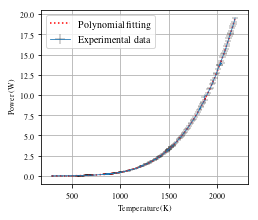

In [78]:
plt.figure(figsize=(3.7,3.2))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='Times')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.errorbar(temp,power, xerr=unc_temp, yerr=unc_pow, ecolor='k',label='Experimental data', elinewidth=0.35,lw=0.8)
plt.plot(temp,P(temp),'r:', label='Polynomial fitting')
plt.xlabel('Temperature (K)')
plt.ylabel('Power (W)')

plt.legend()
plt.grid(True)

plt.savefig('PT.pdf')

In [80]:
temp2=np.array([ 466.40610619,  830.22065573, 1000.21542539, 1073.46412521,
       1363.530863  , 1402.62843251, 1652.9231571 , 1899.84930664,
       2173.39455173, 2357.103475  , 2624.12929789, 2971.90383403,
       3233.49000744])
residuals_s=np.array([-0.03785129,  0.04707074,  0.04904387,  0.03366369,  0.03323602,
       -0.05663441, -0.13612809, -0.21239412,  0.22105553,  0.35325411,
       -0.28829577, -0.07233967,  0.06631941])

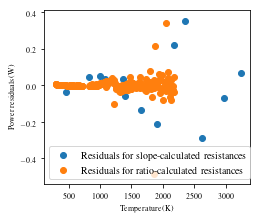

In [83]:
plt.figure(figsize=(3.7,3.2))
plt.scatter(temp2,residuals_s,label='Residuals for slope-calculated resistances')
plt.scatter(temp,P(temp)-power,label='Residuals for ratio-calculated resistances')
plt.xlabel('Temperature (K)')
plt.ylabel('Power residuals (W)')

plt.legend()

plt.savefig('residuals.pdf')

In [84]:
coeff

array([ 1.67554895e-12, -2.46720347e-09,  1.74825773e-06, -5.88427216e-04,
        7.74355664e-02])

In [85]:
sum(residuals_s)/residuals_s.size

1.5384615376517603e-09

In [86]:
sum(P(temp)-power)/power.size

-3.8557918033389776e-15